In [ ]:
# Incomplete

# Table of Contents

<OL><L1><H4><a href="#a">
   - Import clean data & train/test split
</a></H4>

<O1L><L16><H4><a href="#m">
   - Standardize data
</a></H4>

<L16><L2><H4><a href="#b">
   - Dimensionality Reduction: PCA
</a></H4>

<L2><L3><H4><a href="#c">
   - Logistic Regression
</a></H4>

<L3><L4><H4><a href="#d">
   - SVM
</a></H4>

<L4><L5><H4><a href="#e">
   - Random Forest 
</a></H4>

<L6><L7><H4><a href="#g">
   - Feature Importance: Random Forest
</a></H4>

<L6><L7><H4><a href="#g">
   - Xgboost
</a></H4>

<L5><L6><H4><a href="#f">
   - Ensembling
</a></H4>

<L7><H4><a href="#h">
   - Report & Analysis 
</a></H4>
    <BLOCKQUOTE><a href="#i">
     (1) ?
     
</a><BR><BR>

    
</BLOCKQUOTE>
</OL>

In [5]:
# import dependencies

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
# import xgboost as xgb
from pprint import pprint
import itertools
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score, train_test_split

#from mlxtend.plotting import plot_learning_curves
#from mlxtend.plotting import plot_decision_regions

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


<p><a name="a"></a></p>
## - Import clean data & train/test split

In [8]:
# Import cleaned and preprocessed data - diabetes data

df = pd.read_csv("./Sylvia/DiabetesAllDummyF.csv")

In [9]:
# Take a glimpse
df.head()

,Unnamed: 0,Unnamed: 0.1,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,diag_Circulatory,diag_Diabetes,diag_Digestive,diag_Genitourinary,diag_Injury,diag_Musculoskeletal,diag_Neoplasms,diag_Other,diag_Respiratory,race_AfricanAmerican,race_Asian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,dischargeDisposition_Admitted as an inpatient to this hospital,dischargeDisposition_Discharged/transferred to ICF,dischargeDisposition_Discharged/transferred to SNF,dischargeDisposition_Discharged/transferred to a federal health care facility.,dischargeDisposition_Discharged/transferred to a long term care hospital.,dischargeDisposition_Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.,dischargeDisposition_Discharged/transferred to another rehab fac including rehab units of a hospital .,dischargeDisposition_Discharged/transferred to another short term hospital,dischargeDisposition_Discharged/transferred to another type of inpatient care institution,dischargeDisposition_Discharged/transferred to home under care of Home IV provider,dischargeDisposition_Discharged/transferred to home with home health service,dischargeDisposition_Discharged/transferred within this institution to Medicare approved swing bed,dischargeDisposition_Discharged/transferred/referred another institution for outpatient services,dischargeDisposition_Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital,dischargeDisposition_Discharged/transferred/referred to this institution for outpatient services,dischargeDisposition_Left AMA,dischargeDisposition_Neonate discharged to another hospital for neonatal aftercare,dischargeDisposition_Still patient or expected to return for outpatient services,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_Norm,change_Ch,diabetesMed_No,admissionType_Elective,admissionType_Newborn,admissionType_Trauma Center,admissionType_Urgent,admissionSource_ Court/Law Enforcement,admissionSource_ Extramural Birth,admissionSource_ Physician Referral,admissionSource_ Sick Baby,admissionSource_ Transfer from Ambulatory Surgery Center,admissionSource_ Transfer from a Skilled Nursing Facility (SNF),admissionSource_ Transfer from another health care facility,admissionSource_ Transfer from critial access hospital,admissionSource_ Transfer from hospital inpt/same fac reslt in a sep claim,admissionSource_Clinic Referral,admissionSource_HMO Referral,admissionSource_Normal Delivery,admissionSource_Transfer from a hospital,medical_specialty_Cardiology,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_Gastroenterology,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_OBGYN,medical_specialty_Orthopedics,medical_specialty_Other,medical_specialty_Psychiatry,medical_specialty_Pulmonology,medical_specialty_Radiologist,medical_specialty_Surgery,medical_specialty_Urology,primarydiag_Diabetes,primarydiag_Digestive,primarydiag_Genitourinary,primarydiag_Injury,primarydiag_Musculoskeletal,primarydiag_Neoplasms,primarydiag_Other,primarydiag_Respiratory,metformin_Down,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_Steady,repaglinide_Up,glimepiride_Down,glimepiride_Steady,glimepiride_Up,glipizide_Down,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_Steady,glyburide_Up,pioglitazone_Down,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_Steady,rosiglitazone_Up,insulin_Down,insulin_Steady,insulin_Up,diabchange
0,0,0,2,3,59,0,18,0,0,0,9,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,1,1,3,2,11,5,13,2,0,1,6,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0

In [10]:
# Drop the first two columns

df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [11]:
# Let's double check if those two columns got dropped

df.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted,diag_Circulatory,diag_Diabetes,diag_Digestive,diag_Genitourinary,diag_Injury,diag_Musculoskeletal,diag_Neoplasms,diag_Other,diag_Respiratory,race_AfricanAmerican,race_Asian,race_Hispanic,race_Other,gender_Male,gender_Unknown/Invalid,dischargeDisposition_Admitted as an inpatient to this hospital,dischargeDisposition_Discharged/transferred to ICF,dischargeDisposition_Discharged/transferred to SNF,dischargeDisposition_Discharged/transferred to a federal health care facility.,dischargeDisposition_Discharged/transferred to a long term care hospital.,dischargeDisposition_Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.,dischargeDisposition_Discharged/transferred to another rehab fac including rehab units of a hospital .,dischargeDisposition_Discharged/transferred to another short term hospital,dischargeDisposition_Discharged/transferred to another type of inpatient care institution,dischargeDisposition_Discharged/transferred to home under care of Home IV provider,dischargeDisposition_Discharged/transferred to home with home health service,dischargeDisposition_Discharged/transferred within this institution to Medicare approved swing bed,dischargeDisposition_Discharged/transferred/referred another institution for outpatient services,dischargeDisposition_Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital,dischargeDisposition_Discharged/transferred/referred to this institution for outpatient services,dischargeDisposition_Left AMA,dischargeDisposition_Neonate discharged to another hospital for neonatal aftercare,dischargeDisposition_Still patient or expected to return for outpatient services,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_Norm,A1Cresult_>7,A1Cresult_>8,A1Cresult_Norm,change_Ch,diabetesMed_No,admissionType_Elective,admissionType_Newborn,admissionType_Trauma Center,admissionType_Urgent,admissionSource_ Court/Law Enforcement,admissionSource_ Extramural Birth,admissionSource_ Physician Referral,admissionSource_ Sick Baby,admissionSource_ Transfer from Ambulatory Surgery Center,admissionSource_ Transfer from a Skilled Nursing Facility (SNF),admissionSource_ Transfer from another health care facility,admissionSource_ Transfer from critial access hospital,admissionSource_ Transfer from hospital inpt/same fac reslt in a sep claim,admissionSource_Clinic Referral,admissionSource_HMO Referral,admissionSource_Normal Delivery,admissionSource_Transfer from a hospital,medical_specialty_Cardiology,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_Gastroenterology,medical_specialty_InternalMedicine,medical_specialty_Nephrology,medical_specialty_OBGYN,medical_specialty_Orthopedics,medical_specialty_Other,medical_specialty_Psychiatry,medical_specialty_Pulmonology,medical_specialty_Radiologist,medical_specialty_Surgery,medical_specialty_Urology,primarydiag_Diabetes,primarydiag_Digestive,primarydiag_Genitourinary,primarydiag_Injury,primarydiag_Musculoskeletal,primarydiag_Neoplasms,primarydiag_Other,primarydiag_Respiratory,metformin_Down,metformin_Steady,metformin_Up,repaglinide_Down,repaglinide_Steady,repaglinide_Up,glimepiride_Down,glimepiride_Steady,glimepiride_Up,glipizide_Down,glipizide_Steady,glipizide_Up,glyburide_Down,glyburide_Steady,glyburide_Up,pioglitazone_Down,pioglitazone_Steady,pioglitazone_Up,rosiglitazone_Down,rosiglitazone_Steady,rosiglitazone_Up,insulin_Down,insulin_Steady,insulin_Up,diabchange
0,2,3,59,0,18,0,0,0,9,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,3,2,11,5,13,2,0,1,6,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [12]:
# Label the features vs. target variable

y = df['readmitted']
X = df.drop(['readmitted'], axis=1)

In [13]:
# Train/Test split

X_train, X_test, Y_train, Y_test = train_test_split(X,y,random_state=0)

<p><a name="m"></a></p>

## - Standardize data

In [14]:
# Scale the Data: StandardScaler

# Scale the data to zero mean and unit variance
scaler = StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

/Users/sylvia/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/sylvia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """
/Users/sylvia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


<p><a name="b"></a></p>

## - Dimensionality Reduction: PCA

In [9]:
## Dimensionality Reduction using PCA
# Check how many principal components to use?

https://stackoverflow.com/questions/32857029/python-scikit-learn-pca-explained-variance-ratio-cutoff

In [10]:
# Let's take a look at variance explained 

my_model = PCA(n_components=100).fit(X_train_transformed)

print (my_model.explained_variance_)
print (my_model.explained_variance_ratio_)
print (my_model.explained_variance_ratio_.cumsum())

[3.19882898 2.9388751  2.50310201 2.23357559 1.97094222 1.88613196
 1.87214401 1.81869389 1.7373461  1.69596331 1.58096746 1.50863644
 1.42738008 1.41230592 1.27261183 1.25191483 1.21655972 1.18956007
 1.16074041 1.14733815 1.14092272 1.11290466 1.10800507 1.10183722
 1.09744868 1.08192995 1.07791029 1.07605539 1.06545437 1.06211034
 1.05772732 1.05227362 1.0495785  1.04361434 1.036286   1.03241834
 1.0288808  1.02311854 1.02182767 1.01969085 1.01917718 1.01568785
 1.01183168 1.01018691 1.00883944 1.00622105 1.00564686 1.00253237
 1.00183221 1.00084652 0.99985383 0.99847437 0.99783359 0.99668464
 0.99515189 0.99385313 0.99060373 0.98909418 0.98524828 0.98417252
 0.98369317 0.98246777 0.98042073 0.97884835 0.97566526 0.97225762
 0.96763935 0.96388742 0.95960957 0.95823703 0.95255437 0.94310725
 0.94181205 0.93953548 0.93212229 0.91741252 0.91216592 0.90493806
 0.89069858 0.87485606 0.86428633 0.85282035 0.83980743 0.81661327
 0.80187305 0.77247704 0.74561923 0.72616009 0.72305012 0.7196

In [11]:
# each row shows how much variance is explained by adding one additional feature

for feature in zip(range(1,114), my_model.explained_variance_ratio_.cumsum()):
    print(feature)

(1, 0.028818279090857213)
(2, 0.0552946313321781)
(3, 0.0778450999045304)
(4, 0.09796740251166614)
(5, 0.11572363871276684)
(6, 0.13271581857758474)
(7, 0.14958198081265003)
(8, 0.16596661048787606)
(9, 0.1816183771991838)
(10, 0.1968973259214994)
(11, 0.21114027602660773)
(12, 0.22473159530860193)
(13, 0.2375908753296094)
(14, 0.25031435207163005)
(15, 0.2617793235305472)
(16, 0.27305783549670387)
(17, 0.2840178330175681)
(18, 0.2947345904040552)
(19, 0.30519171121413324)
(20, 0.3155280909030767)
(21, 0.3258066740034828)
(22, 0.3358328421373433)
(23, 0.34581486976135933)
(24, 0.35574133116249196)
(25, 0.3656282562192058)
(26, 0.37537537284992617)
(27, 0.3850862763819588)
(28, 0.3947804690518318)
(29, 0.4043791570817863)
(30, 0.41394771871466857)
(31, 0.42347679364432195)
(32, 0.4329567361863515)
(33, 0.44241239830962253)
(34, 0.45181432927329024)
(35, 0.4611502391611315)
(36, 0.4704513053041105)
(37, 0.47972050168331576)
(38, 0.4889377857952135)
(39, 0.4981434404854863)
(40, 0.5073298

https://towardsdatascience.com/an-approach-to-choosing-the-number-of-components-in-a-principal-component-analysis-pca-3b9f3d6e73fe

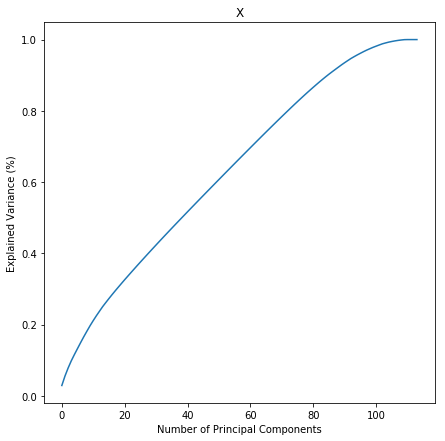

In [30]:
# Plot of explained variance % vs. number of components

N_component = 114;

Data_pca = PCA(n_components=N_component).fit(X_train_transformed)
#print(Data_pca.explained_variance_ratio_.cumsum())

plt.figure(figsize=(7,7))
plt.plot(np.cumsum(Data_pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance (%)') #for each component
plt.title('X')
plt.show()

This plot tells us that selecting 86 components we can preserve something around 90.27% of the total variance of the data. 

In [13]:
# Apply PCA   
N_components=86 # Define the number of principle components
Data_pca = PCA(n_components=N_components).fit(X_train_transformed)

# Shape of training data before and after the PCA is applied
print("Shape of training data BEFORE PCA")
print(X_train_transformed.shape)

print("Shape of training data AFTER PCA")
X_train_pca = Data_pca.transform(X_train_transformed)
print(X_train_pca.shape)

Shape of training data BEFORE PCA
(71754, 114)
Shape of training data AFTER PCA
(71754, 90)


** Comments **

The goal of applying PCA was to reduce dimentionality, however, in our case the results of PCA are poor. PCA tends to works best on data where the correlations are linear, which is most of the time an approximation. The results of PCA may suggest that the relationship is non-linear. 

<p><a name="c"></a></p>
## - Logistic Regression

+ Hyperparameter Tuning Using Grid Search

In [14]:
# Create logistic regression
logistic = LogisticRegression()

In [33]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [16]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [17]:
# Fit grid search
best_model = clf.fit(X_train_transformed,Y_train)

In [18]:
# View best hyperparameters
bP = best_model.best_estimator_.get_params()['penalty']
bC = best_model.best_estimator_.get_params()['C']

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 1.0


+ Logistic Regression with best hyperparameters

In [51]:
LogRegModel= LogisticRegression(penalty='l1', C=1)   

FittedLogRegModel= LogRegModel.fit(X_train_transformed,Y_train)
print("Logistic Regression Score with ALL features:")

FittedLogRegModel.score(X_test_transformed, Y_test)

Logistic Regression Score with ALL features:


0.8827710188553033

https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_grid_search/

<p><a name="d"></a></p>
## - SVM

+ Hyperparameter tuning using Grid Search

In [23]:
# Cross Validation With Parameter Tuning Using Grid Search

parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(X_train_transformed, Y_train)

# View the accuracy score
print('Best score for data1:', clf.best_score_) 

# View the best parameters for the model found using grid search
bestC = clf.best_estimator_.C
bestK = clf.best_estimator_.kernel
bestG = clf.best_estimator_.gamma

print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

KeyboardInterrupt: 

+ SVM with best parameters

In [45]:
svmModel = SVC(kernel=bestK, gamma = bestG, C=bestC).fit(X_train_transformed,Y_train)
print("Accuracy: %.2f" % svmModel.score(X_test_transformed, Y_test))

#Temporary: for testing purposes

#svmModel = SVC(kernel='linear', gamma = 1, C=0.001).fit(X_train_transformed,Y_train)
#print("Accuracy: %.2f" % svmModel.score(X_test_transformed, Y_test))

KeyboardInterrupt: 

https://chrisalbon.com/machine_learning/model_evaluation/cross_validation_parameter_tuning_grid_search/

<p><a name="e"></a></p>
## - Random Forest

+ Hyperparameter tuning using RandomizedSearchCV and GridSearchCV

In [15]:
# RandomizedSearchCV

In [16]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)



{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [20]:
from sklearn.linear_model import ElasticNetCV

EN = ElasticNetCV(cv=5, random_state=0)
EN.fit(X_train_transformed,Y_train)  
'''ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)'''
print(EN.alpha_) 


0.0012336114951146911


In [24]:
# Use the elasticNet to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = ElasticNetCV(cv=5, random_state=0)
# Fit the random search model
rf_random.fit(X_train_transformed, Y_train)

rf_random.get_params

<bound method BaseEstimator.get_params of ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)>

In [21]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train_transformed, Y_train)
base_accuracy = evaluate(base_model, test_features, test_labels)

NameError: name 'test_features' is not defined

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)

In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

In [ ]:
# GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

+ Random Forest with best hyperparameters

In [43]:
# Create a random forest classifier  
clf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_transformed, Y_train)

clf.score(X_test_transformed, Y_test)

0.8819348634976378

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

## - Feature Importance: Random Forest

In [ ]:
## Random Forest for feature importance

# Create a random forest classifier  #CHANGE THIS n_estimators to a higher number?
clf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_transformed, Y_train)

# Print the name and gini importance of each feature
for feature in zip(X.columns, clf.feature_importances_):
    print(feature)

In [ ]:
## Base line performance?? 

https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e

## - XGBoost

https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

+ Hyperparameter Tuning

In [ ]:
# Find how to tune hyperparameter then substitute the optimal parameters in the algo below

+ XGB

In [49]:
model=xgb.XGBClassifier(random_state=0,learning_rate=0.01)
model.fit(X_train_transformed, Y_train)
model.score(X_test_transformed, Y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8830636732304862

## - Ensembling

In [55]:
#Method 1: Simple ensemble technique: averaging

model1 = FittedLogRegModel #logistic reg.
model2 = svmModel #SVM
model3= clf #Random F.
model4= model #Xgboost

pred1=model1.predict_proba(X_test_transformed)
#pred2=model2.predict_proba(X_test_transformed)
pred3=model3.predict_proba(X_test_transformed)
pred4=model4.predict_proba(X_test_transformed)

finalpred=(pred1+pred3+pred4)/3

print(finalpred)

[[0.90048127 0.09951873]
 [0.83933339 0.16066661]
 [0.71209555 0.28790446]
 ...
 [0.85256775 0.14743225]
 [0.78699781 0.21300218]
 [0.69928297 0.30071703]]


In [ ]:
#Method 2: Stacking

https://statsbot.co/blog/ensemble-learning/

In [ ]:


#clf1 = KNeighborsClassifier(n_neighbors=1)
#clf2 = RandomForestClassifier(random_state=1)
#clf3 = GaussianNB()
#lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[model2, model3, model4], 
                          meta_classifier=model1)

In [58]:
label = ['SVM', 'R.F.', 'XGBM', 'Stacking Classifier']
clf_list = [model2, model3, model4, sclf]
    
fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print "Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label)
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X_train_transformed, Y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_transformed, y=Y_train, clf=clf)
    plt.title(label)

plt.show()

SyntaxError: invalid syntax (<ipython-input-58-7ba8de379915>, line 13)

## - Results & Evaluation

In [ ]:
#plot classifier accuracy    
plt.figure()
(_, caps, _) = plt.errorbar(range(4), clf_cv_mean, yerr=clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['KNN', 'RF', 'NB', 'Stacking'])        
plt.ylabel('Accuracy'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble');
plt.show()

In [ ]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model=False, style='ggplot')
plt.show()